<h2 style="color: green;">이미지 처리 고급과정</h2>

**이미지 필터링 이란?**

실제로 원본 이미지를 선명하게 하거나 흐리게 만드는 데 사용할 작은 매트릭스입니다. 

**openCV에서 이미지를 매끄럽게 만드는 방법은 무엇인가?**

예를 들어 이미지 임계값 및 가장자리 감지에 사용됩니다.
또한 이러한 블러링 기술은 일반적으로 노이즈를 줄이는 데 사용되며 저해상도 이미지에서 픽셀 효과를 줄이기 위해 적용할 수도 있습니다.

## *평균화 필터*

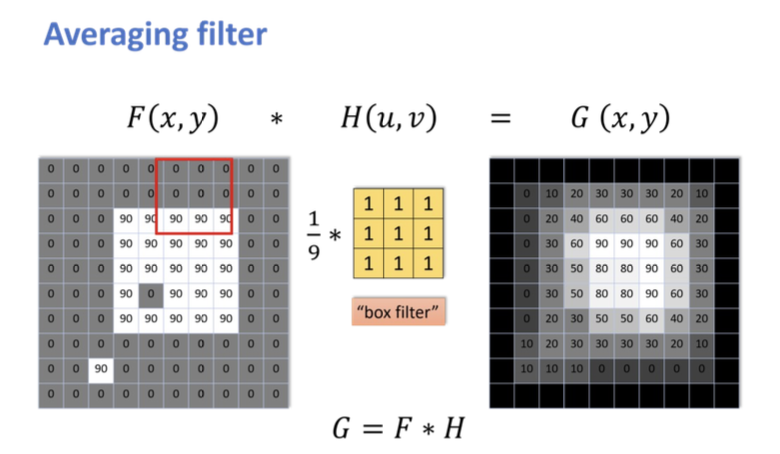

OpenCV에서 평균화를 수행하기 위해 cv2.blur() 및 cv2.boxFilter() 함수를 모두 사용합니다.

필요한 인수는 두 가지 입니다. 흐르게 처리하려는 이미지와 필터 크기입니다. 필터 크기가 커질수록
출력이미지가 더 흐려지는 것을 보여주기 위해 필터에 세 가지 다른 크기를 선택했습니다.

## *이미지 선명도 처리 실습 - Blur*

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

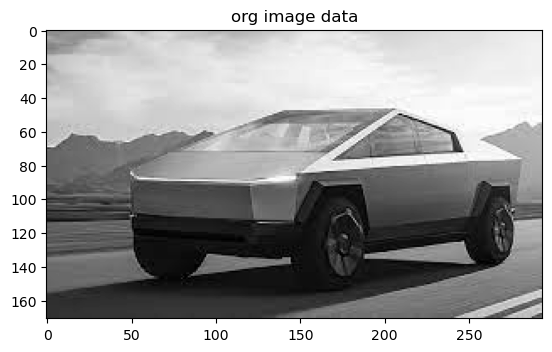

In [6]:
#이미지 읽기
image_path = "../data/car.png"
image = cv2.imread(image_path, 0)

#색상의 문제 발생 BGR >> RGB 컨버터 필요
plt.imshow(image, 'gray')
plt.title('org image data')
plt.show()

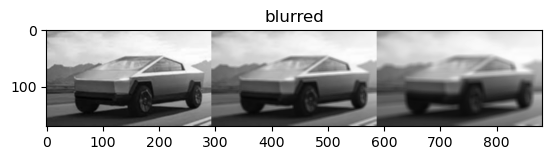

In [7]:
#이미지 선명하게 처리하기
blurred_1 = np.hstack([
    cv2.blur(image,(3,3)),
    cv2.blur(image,(5,5)),
    cv2.blur(image,(9,9))
])

plt.imshow(blurred_1, 'gray')
plt.title('blurred')
## *이미지 선명도 처리 실습 - Gaussian blur*plt.show()

## *이미지 선명도 처리 실습 - Gaussian blur*

### **가우시안 필터 적용**

평균화 필터 외에도 이미지 블러링을 수행하기 위해 몇 가지 다른 공통 필터를 사용할 수 있습니다. 이제 조금 더 복잡한 필터를 살펴보겠습니다. 이미지 처리에서 가장 일반적으로 사용되는 커널이며 가우시안 필터라고 합니다. 이 필터를 생성하기 위해 유명한 가우시안 함수를 사용합니다. 이 함수는 이벤트가 평균값을 중심으로 발생할 확률을 나타냅니다. 또한 이 함수의 표준 편차 sigma(시그마)는 이 분포의 폭을 제어합니다. 이 함수 값을 샘플링하여 가우시안 필터 행렬에 대한 계수를 얻습니다. 다른 sigma(시그마) 값의 효과는 다음 이미지 에서 관찰할 수 있습니다.

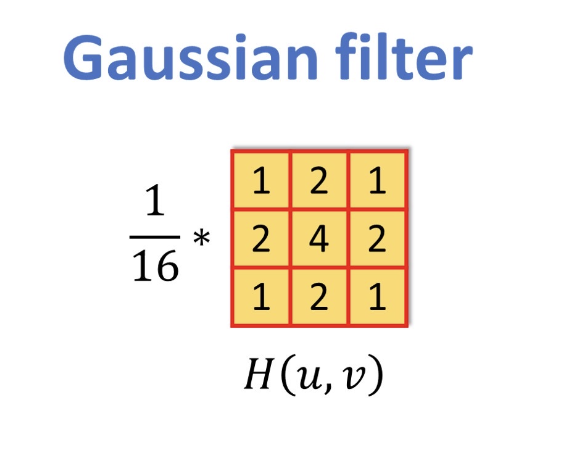

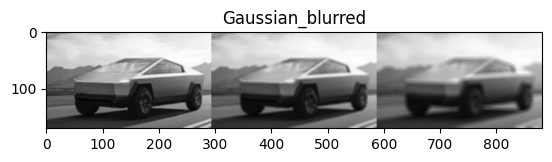

In [19]:
Gaussian_blurred_1 = np.hstack([
    cv2.GaussianBlur(image, (3,3),0),
    cv2.GaussianBlur(image, (5,5),0),
    cv2.GaussianBlur(image, (9,9),0)
])

plt.imshow(blurred_1, 'gray')
plt.title('Gaussian_blurred')
plt.show()

## *이미지 선명도 처리 실습 - Sharpening filter*

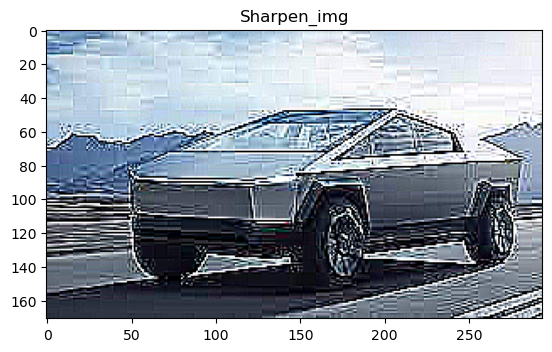

In [9]:
#이미지 읽기
image_path = "../data/car.png"
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Creating out sharpening filter
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

#Applying cv2.filter2D function on out Cybertruck image
sharpen_img = cv2.filter2D(image, -1, filter)

plt.imshow(sharpen_img)
plt.title('Sharpen_img')
plt.show()

## *이미지 선명도 처리 실습 - Custom filter*

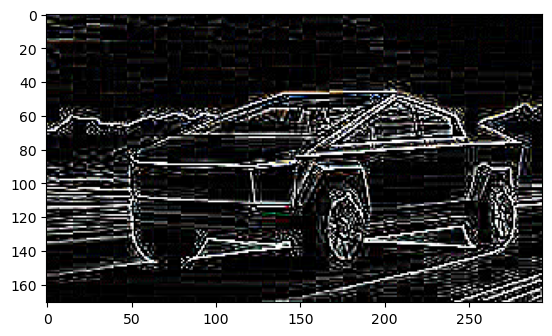

In [11]:
#이미지 읽기
image_path = "../data/car.png"
image = cv2.imread(image_path,1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filter = np.array(([0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1], [0,-1,-2,-1,0], [0,0,-1,0,0]))
mexican_hat_img = cv2.filter2D(image, -1, filter)
  
plt.imshow(mexican_hat_img)
plt.show()

## *엠보스 효과*

필터의 방향에 따라 사용할 수 있는 여러 필터가 있습니다. 이 필터의 수직, 수평 또는 대각선 버전을 가질 수 있습니다. 우리의 경우 수직 이미지를 사용하고 일단 이미지를 필터링하면 매우 낮은 차이를 얻게 됩니다. 즉, 출력 이미지가 다소 검은색이 됩니다. 따라서 각 픽셀에 상수 128을 추가하고 결과 이미지를 회색으로 얻습니다.

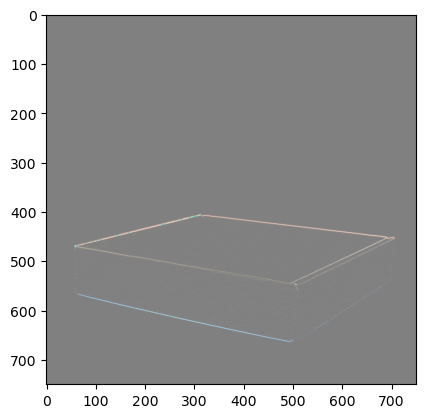

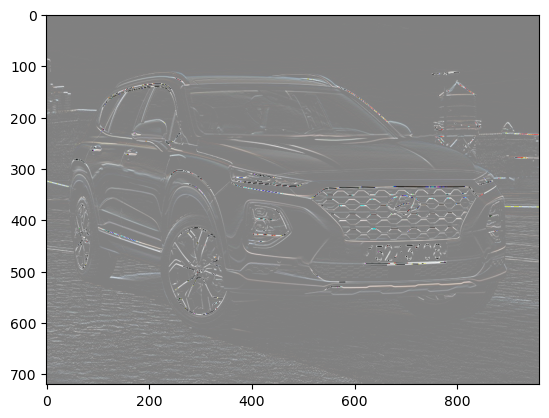

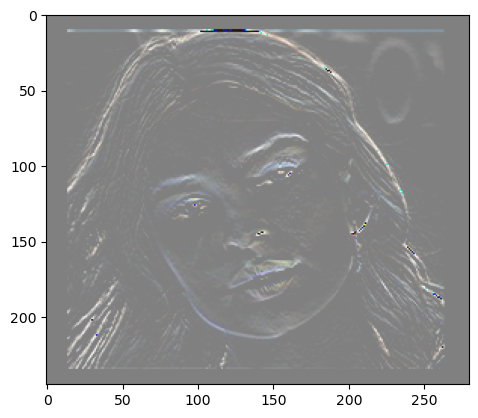

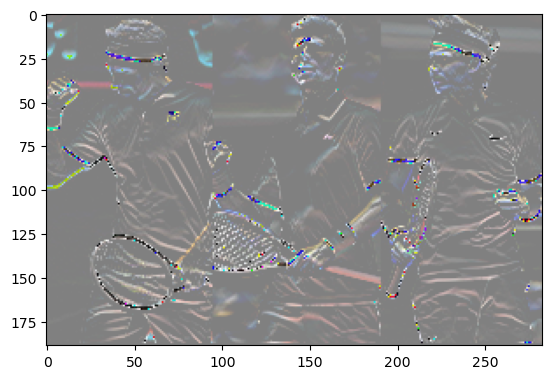

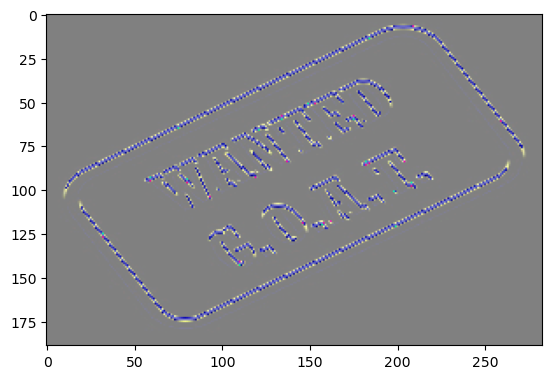

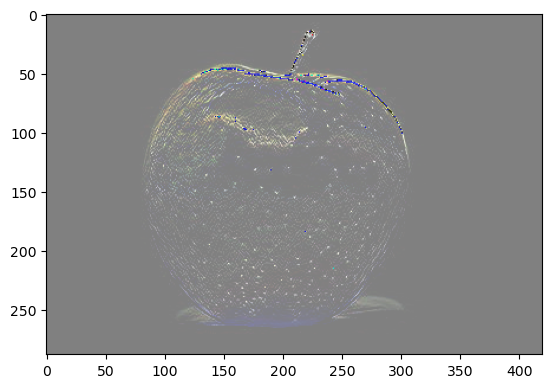

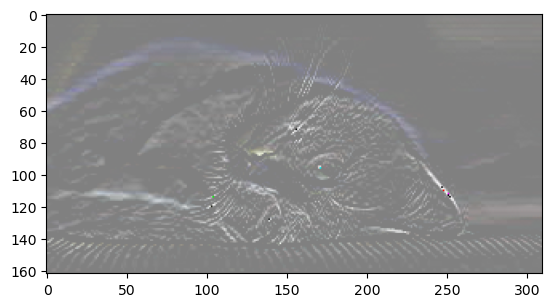

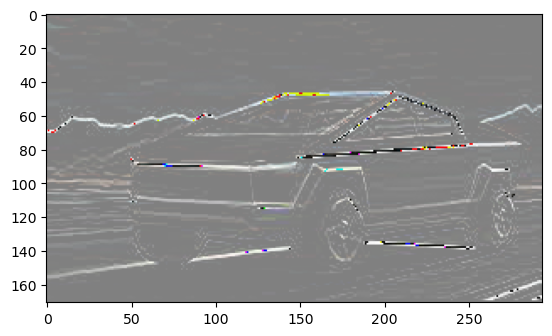

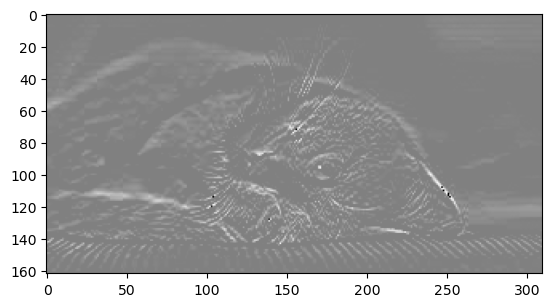

In [17]:
image_path = '../data/'

image_list = glob.glob(os.path.join(image_path, '*.png'))

for path in image_list :
    image = cv2.imread(path, 1)
    # 1을 넣으면 컬러 이미지로 로드하겠다는 의미입니다.
    # 만약 0을 넣으면 그레이스케일 이미지로 로드
    
    #엠보스 효과
    filter_temp = np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]])
    
    emboss_img = cv2.filter2D(image, -1, filter_temp)
    emboss_img = emboss_img + 128
    
    plt.imshow(emboss_img)
    plt.show()

## *팽창*

**이미지 처리에서 팽창이란 무엇인가 ?**
이미지의 형태학적 변환은 팽창과 침식이라는 두 가지 기본 작업으로 구성됩니다. 팽창은 정확히 들리 는 그대로입니다. 주어진 이미지에서 물체의 밝은 픽셀을 추가(확장)한 것입니다.

### 팽창을 하는 과정

커널을 통해 이미지 전체에 적용하고 여기서 밝은 부분을 추가하는 것이기 때문에 각 위치에 대한 로컬 최대값을 계산한다. 이 때 로컬 최대값은 출력 이미지에 저장한다. 정리하자면 확장 과정은 이미지와 커널 사이의 현재 겹침의 로컬 최대값을 찾는 것으로 볼 수 있다.

## *침식*

**이미지 처리에서 침식이란 무엇인가 ?**
확장 외에도 침식이라고 하는 보완 작업도 있습니다. 이 작업은 확장의 완전한 반전입니다. 커널은 이미지를 스캔하고 커널과 이미지 픽셀 사이의 겹치는 간격을 찾습니다.

그러나 확장과는 달리 여기서는 로컬 최소값을 계산합니다 .
즉, 커널의 1이 이미지의 1과만 겹치는 경우에만 결과가 1(흰색 픽셀)이 됩니다.
반면에 다른 모든 경우에는 로컬 최소값이 0(검은색 픽셀)이 됩니다.

## *팽창과 침식 실습*

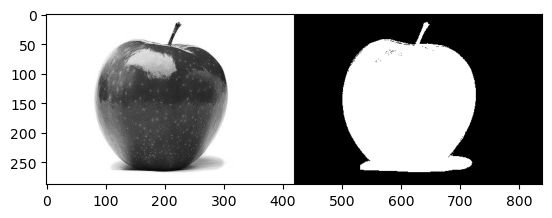

In [25]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)

# 사용하는 추가 매개변수는 임계 강도 픽셀 값이며, 이 경우에는 230과 255값으로 설정
# 230보다 큰 모든 값을 255값으로 설정됨을 의미
# 230보다 작은 모든 값은 흰색, 230보다 큰 값은 검은색

image_list = np.hstack([
    image,
    mask
])

plt.imshow(image_list, 'gray')
plt.show()

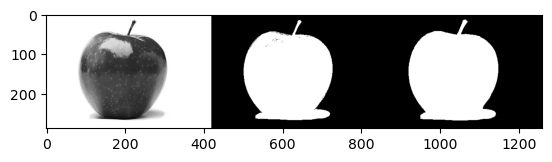

In [26]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
# 여기서 우리는 커널을 픽셀 크기가 3x3 작은 정사각형으로 정의 할 수 있습니다.
# 이 이미지의 행렬의 유형은 부호 없는 정수여야 합니다. (unit8)

dilation = cv2.dilate(mask, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

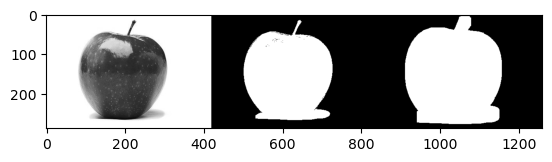

In [27]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=5)
# 5x5 크기의 커널을 사용하면 확장된 이미지에서 흰색 영역이 훨씬 더 확장
# 확장 프로세 스가 연속적으로 5번 반복됨을 의미

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

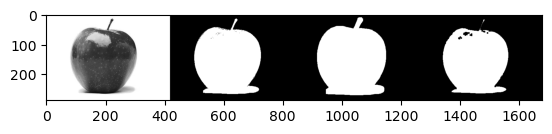

In [30]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=2)
erosion = cv2.erode(mask, kernel)
# 비슷한 방식으로 함수를 사용하여 침식 연산을 적용합니다. Cv2.erode()는 함수와 동일한 매개변수를 cv2.dilate() 가집니다.

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion
])

plt.imshow(image_list, 'gray')
plt.show()

## *개페 실습*

팽창 및 침식과 밀접한 관련이 있는 또 다른 연산자는 열림이라고 합니다. 실제로 침식과 확장으로 구성된 작업입니다.

cv2.morphologyEx()라는 함수를 사용합니다. 이 함수는 여러 작업에 사용 할 수 있으므로 사용하려는 작업을 지정하는 매개 변수를 추가해야 합니다. 즉 팽창 먼저 적용 후 침식을 적용합니다.

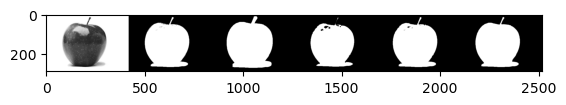

In [33]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=2)
erosion = cv2.erode(mask, kernel)

#개폐 open close
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# cv2.MORPH_OPEN은 개폐 작업을 나타내며, 입력 이미지의 잡음을 제거하는데 사용됩니다.
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# cv2.morphologyEx() 함수를 사용하여 입력 이미지인 mask에 대해 폐폐(closing) 작업을 수행합니다.

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing
])

plt.imshow(image_list, 'gray')
plt.show()

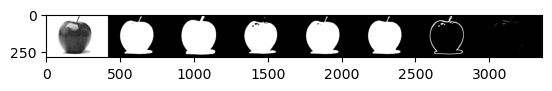

In [32]:
image_path = "../data/apple.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=2)
erosion = cv2.erode(mask, kernel)

#개폐 open close
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
#MORPH_GRADIENT 연산은 이미지에서 경계, 윤곽선, 테두리 등을 추출하는 데 사용될 수 있습니다
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)
#MORPH_TOPHAT 연산은 이미지의 밝은 영역에서 뚜렷한 경계를 강조하는 데 사용될 수 있습니다.

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing,
    mg,
    th
])

plt.imshow(image_list, 'gray')
plt.show()